In [30]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp, RK23, RK45
from scipy.integrate import quad

# Ecuaciones Diferenciales

---
### Profesor: Juan Marcos Marín
### Profesor: Daniel Ruiz
### Nombre: Ross Miranda y Laura Rios
*Métodos computacionales 2024-II*

---

# 1
El número de átomos radiactivos que decaen en un período de tiempo dado es proporcional al número de átomos en la muestra:

$$
\frac{dN}{dt} = -\lambda N
$$

con $\lambda=\frac{\ln{2}}{t_{1/2}}$ siendo $t_{1/2}$ el tiempo de vida media.

Escriba un programa que utilice el método de Euler para graficar $N(t)$. Compare con la solución exacta, $N(t) = N_0 e^{-\lambda t}$, para comparación. Tome $N_0=1000$ y $t_{1/2}=15$ horas, lo cual es el valor para el $^{24}Na$.

In [ ]:
# Datos iniciales

N0 = 1000
t_un_medio = 15 # Horas
lambda_ = np.log(2)/t_un_medio
t = np.arange(0,80,0.1)

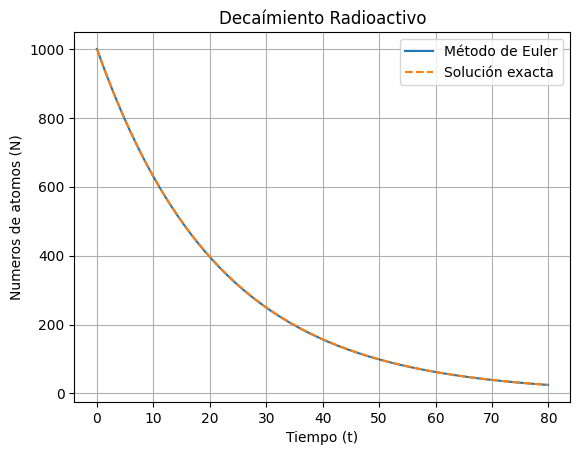

In [ ]:
N_euler = np.zeros(len(t))
N_euler[0] = N0

for i in range(1, len(t)):
    dN = -lambda_ * N_euler[i-1] * 0.1
    N_euler[i] = N_euler[i-1] + dN

# Solución exacta
N_exact = N0 * np.exp(-lambda_ * t)

# Plot
plt.plot(t, N_euler, label="Método de Euler")
plt.plot(t, N_exact, label="Solución exacta", linestyle='--')
plt.xlabel('Tiempo (t)')
plt.ylabel('Numeros de atomos (N)')
plt.title('Decaímiento Radioactivo')
plt.legend()
plt.grid()
plt.show()

# 2
El péndulo de la figura está suspendido de un collar deslizante. El sistema está en reposo cuando se le impone un movimiento oscilante $y(t)=Y \sin{\omega t}$ sobre la cuenta, comenzando en $t=0$. La ecuación diferencial que describe el movimiento del péndulo es

$$\ddot{\theta}=-\frac{g}{L} \sin{\theta} + \frac{\omega^2}{L}Y \cos{\theta}\sin{\omega t} $$

Grafique $\theta$ vs $t$ con $0\leq t \leq 10s$ y determine el $\theta$ mayor en este intervalo. Use $g=9.8 \ m/s^2$, $L=1.0 \ m$, $Y=0.25 \ m$ y $\omega=2.5 \ rad/s$. Con $\theta(0)=0$ y $\dot{\theta}(0)=0.1 \ rad/s$.


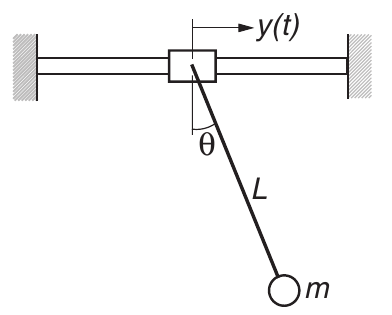

In [ ]:
# Parametro iniciales

g = 9.8    # Gravedad
L = 1.0    # Metros
Y = 0.25   # Metros
w = 2.5    #rad/s
y0 = np.array([0,0.1])    # Condiciones iniciales
t = np.linspace(0,10,200)
t_span = (0,10)    # tiempo inicial y final
'''
Volver el sistema de segundo orden,
una ecuancion de primer orden

theta_1 = theta
theta_2 = d_theta_1       (derivada de theta_1)
'''

def ecuacion(t,y):

    '''
    y: Matriz con la posicón y velocidad angular (acelración angular)
    t: tiempo
    '''
    theta_1, theta_2 = y

    dtheta_1dt = theta_2
    dtheta2_dt = - (g / L) * np.sin(theta_1) + (w**2 / L) * Y * np.cos(theta_1) * np.sin(w * t)

    return np.array([dtheta_1dt, dtheta2_dt])

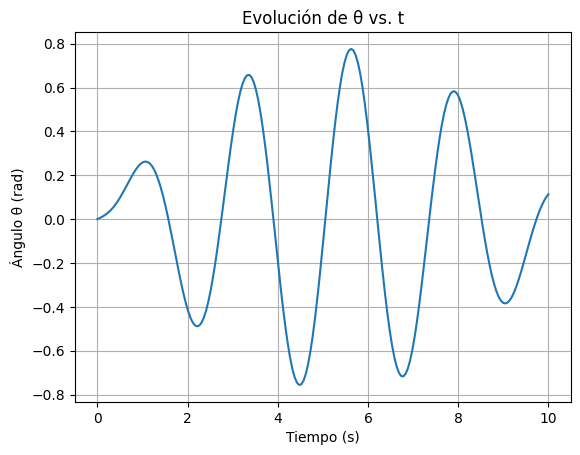

In [ ]:
# Graficar

sol = solve_ivp(ecuacion, t_span, y0,t_eval=t)
plt.plot(sol.t, sol.y[0])  # sol.y[0] es posicion angular
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo θ (rad)")
plt.title("Evolución de θ vs. t")
plt.grid()
plt.show()

# 3
El circuito eléctrico de la figura cuenta con una resistencia y un capacitor:

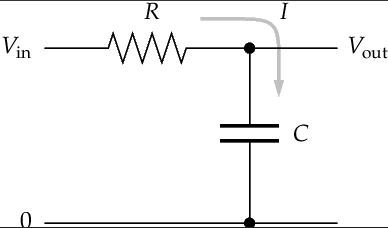


Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.


In [22]:
# Parametros iniciales

t = np.linspace(0,10,300)
t_span = (0,10)
V0 = np.array([0])    # condición inicial
RC_1 = 0.01
RC_2 = 0.1
RC_3 = 1
# Función en tramos de Vint

def vint(t):
    if np.floor(2*t%2==0):    # si es divisible por dos
        return 1
    else:
        return -1


# Ecuación diferencial para RC_1 = 0.01

def funcion_RC_1(t,v_out):
    return (1 / RC_1) * (vint(t) - v_out)

# Ecuación diferencial para RC_2 = 0.1

def funcion_RC_2(t,v_out):
    return (1 / RC_2) * (vint(t) - v_out)

# Ecuación diferencial para RC_3 = 1

def funcion_RC_3(t,v_out):
    return (1 / RC_3) * (vint(t) - v_out)


sol1 = solve_ivp(funcion_RC_1, t_span, V0, t_eval=t, method='RK45')
sol2 = solve_ivp(funcion_RC_2, t_span, V0, t_eval=t, method='RK45')
sol3 = solve_ivp(funcion_RC_3, t_span, V0, t_eval=t, method='RK45')

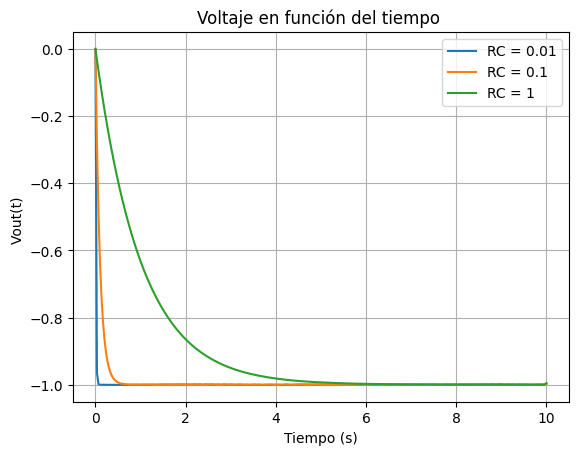

In [23]:
# Graficar
plt.plot(sol1.t, sol1.y[0], label=f'RC = {RC_1}')
plt.plot(sol2.t, sol2.y[0], label=f'RC = {RC_2}')
plt.plot(sol3.t, sol3.y[0], label=f'RC = {RC_3}')

# Configuración del gráfico
plt.xlabel("Tiempo (s)")
plt.ylabel("Vout(t) ")
plt.title("Voltaje en función del tiempo ")
plt.legend()
plt.grid()
plt.show()

# 4


Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con h=0.001 y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

In [24]:
# Funcion RK4
def RK4(f, x0, y0, h, x_end):
    """
    Método de Runge-Kutta de 4º orden para sistemas de ecuaciones diferenciales.

    Args:
        f: Función que define el sistema de EDOs.
        x0: Valor inicial de x.
        y0: Vector de valores iniciales de y (np.array).
        h: Tamaño del paso.
        x_end: Valor final de x.

    Returns:
        x_points: Valores de x.
        y_points: Matriz con las aproximaciones de y en cada paso.
    """
    n = int(np.round((x_end - x0) / h))
    x_points = np.zeros(n+1)
    y_points = np.zeros((n+1, len(y0)))

    x_points[0] = x0
    y_points[0, :] = y0

    for i in range(n):
        x = x_points[i]
        y = y_points[i, :]

        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)

        x_points[i+1] = x + h
        y_points[i+1, :] = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    x_points[-1] = x_end  # Asegurar que el último punto es exactamente x_end
    return x_points, y_points

In [25]:
# Parametros iniciales
g = 9.8
l= 1.0

'''
Como en el punto dos debemos volver esta ecuacion a una
ecuación de primer orden
'''
u0_1 = np.array([1, 0])
u0_2 = np.array([np.pi/2, 0])
t_inicial = 0    # Tiempo inicial
t_final = 10      # Tiempo final
h = 0.001

def ecuacion(t,u):

    '''
    u: array con la posicón y velocidad angular (acelración angular)
    t: tiempo
    '''
    u_1, u_2 = u

    du_1dt = u_2
    du_2dt = -  (g / l) * np.sin(u_1)

    return np.array([du_1dt, du_2dt])

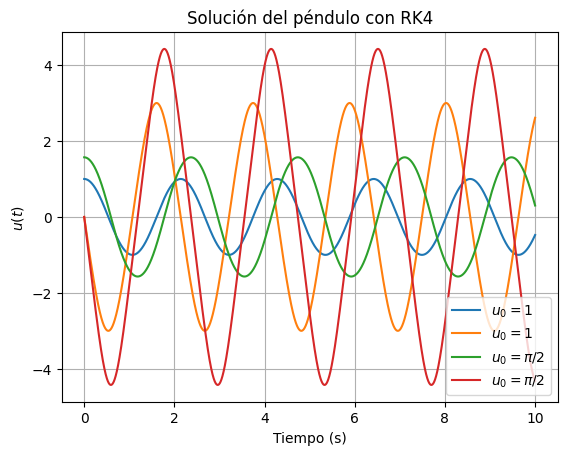

In [28]:
# con   u0=1
sol_uno = RK4(ecuacion, t_inicial, u0_1, h, t_final)

# con u0 = pi/2
sol_dos = RK4(ecuacion, t_inicial, u0_2, h, t_final)


# Graficar

plt.plot(sol_uno[0], sol_uno[1], label=r'$u_0 = 1$')
plt.plot(sol_dos[0], sol_dos[1], label=r'$u_0 = \pi/2$')
plt.xlabel("Tiempo (s)")
plt.ylabel(r"$u(t)$")
plt.legend()
plt.title("Solución del péndulo con RK4")
plt.grid()
plt.show()

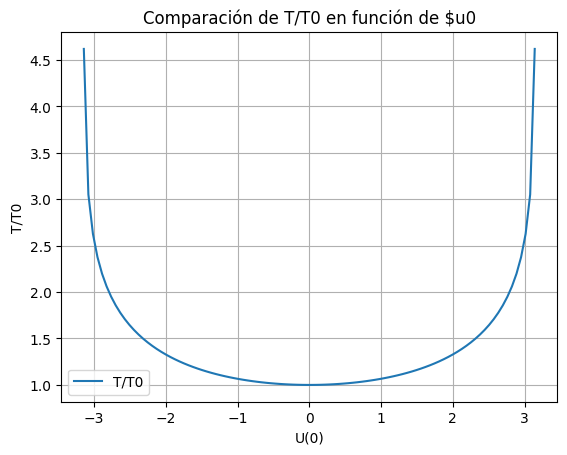

In [32]:
# Función para calcular K(α) numéricamente
def K_integral(alpha):
    integrand = lambda z: 1 / np.sqrt((1 - z**2) * (1 - alpha * z**2))
    return quad(integrand, 0, 1 - 1e-6)[0]

# Valores de u0
u0_vals = np.linspace(-np.pi, np.pi, 100)
alpha_vals = np.sin(u0_vals / 2) ** 2

# Cálculo de la integral elíptica
integral_K = np.array([K_integral(alpha) for alpha in alpha_vals])

# Relación T/T0
T_T0 = (2 / np.pi) * integral_K

# Gráfica
plt.plot(u0_vals, T_T0, label='T/T0')
plt.xlabel(r'U(0)')
plt.ylabel(r'T/T0')
plt.title(r'Comparación de T/T0 en función de u0')
plt.legend()
plt.grid()
plt.show()

# 5

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


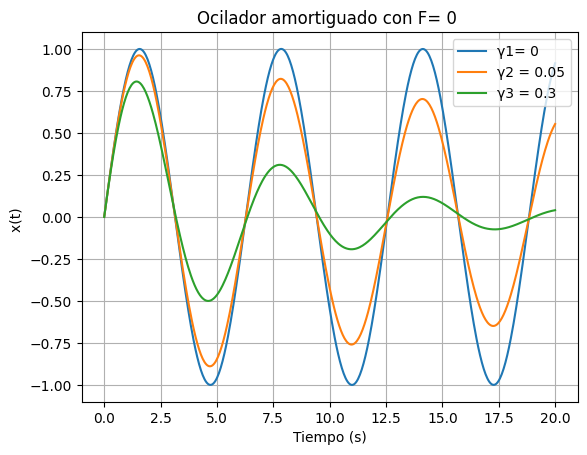

In [15]:
# Parametro iniciales

m = 1
k = 1
w = np.sqrt(m/k)

t_span = (0,20)
t = np.linspace(0,20,500)

# condiciones iniciales
y0 = np.array([0,1])
F = 0

# Para el primer caso donde F = 0 y γ=[0,0.05,0.3]

γ1 = 0
γ2 = 0.05
γ3 = 0.3

def oscilador_γ1(t, y):
    x, v = y  # y[0] = x, y[1] = v

    dxdt = v
    dvdt =  -γ1  * v - w**2 * x
    return np.array([dxdt, dvdt])


def oscilador_γ2(t,y):
    x, v = y  # y[0] = x, y[1] = v

    dxdt = v
    dvdt =  -γ2  * v - w**2 * x
    return np.array([dxdt, dvdt])


def oscilador_γ3(t,y):
    x, v = y  # y[0] = x, y[1] = v

    dxdt = v
    dvdt =  -γ3  * v - w**2 * x
    return np.array([dxdt, dvdt])



# Resolviendo la ecuación

sol1 = solve_ivp(oscilador_γ1,t_span,y0,t_eval=t,method='RK45')
sol2 = solve_ivp(oscilador_γ2,t_span,y0,t_eval=t,method='RK45')
sol3 = solve_ivp(oscilador_γ3,t_span,y0,t_eval=t,method='RK45')


#Graficando
plt.plot(sol1.t, sol1.y[0], label=f'γ1= {γ1}')
plt.plot(sol2.t, sol2.y[0], label=f'γ2 = {γ2}')
plt.plot(sol3.t, sol3.y[0], label=f'γ3 = {γ3}')

# Configuración del gráfico
plt.xlabel("Tiempo (s)")
plt.ylabel("x(t) ")
plt.title("Ocilador amortiguado con F= 0 ")
plt.legend()
plt.grid()
plt.show()

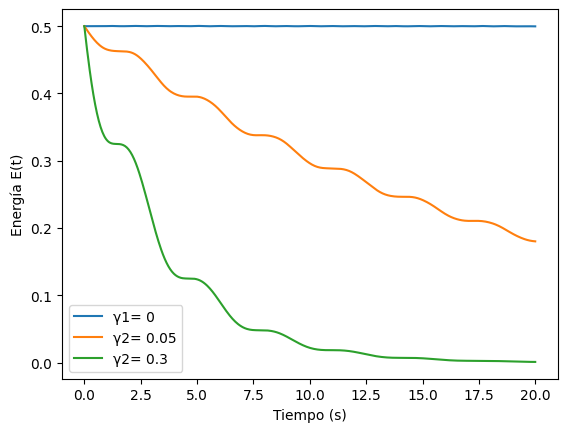

In [19]:
# Para E(t) con γ1 = 0

t_1= sol1.t
x1 = sol1.y[0]  # Posición
v1 = sol1.y[1]  # Velocidad

E1 =  (0.5 * m * v1**2) + (0.5 * k * x1**2)

# Para E(t) con γ2 = 0.05

t_2= sol2.t
x2 = sol2.y[0]  # Posición
v2 = sol2.y[1]  # Velocidad

E2 =  (0.5 * m * v2**2) + (0.5 * k * x2**2)

# Para E(t) con γ3 = 0.3

t_3= sol3.t
x3 = sol3.y[0]  # Posición
v3 = sol3.y[1]  # Velocidad

E3 =  (0.5 * m * v3**2) + (0.5 * k * x3**2)

# Graficar
plt.plot(t_1, E1, label= f'γ1= {γ1}' )
plt.plot(t_2,E2, label=f'γ2= {γ2}')
plt.plot(t_3,E3, label=f'γ2= {γ3}')
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía E(t)")
plt.legend()
plt.show()

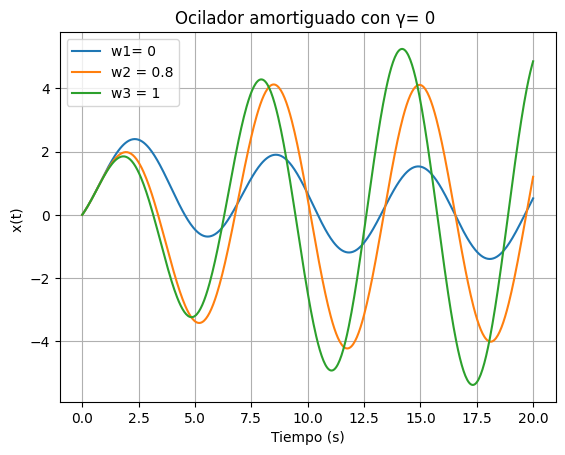

In [18]:
# Para γ = 0

# Parametros iniciales
m = 1.0   # kg
k = 1.0   # N/m
w = np.sqrt(k/m)
gamma = 0
F_0 = 1.0  # N
T = 10.0   # s
omega1 = 0
omega2 = 0.8
omega3 = 1


# Funcion de fuerza

def fuerza_externa_1(t):
    return F_0 * np.cos(omega1 * t) * np.exp(-t**2 / T**2)

def fuerza_externa_2(t):
    return F_0 * np.cos(omega2 * t) * np.exp(-t**2 / T**2)

def fuerza_externa_3(t):
    return F_0 * np.cos(omega3 * t) * np.exp(-t**2 / T**2)



def oscilador_f1(t,y):
    x, v = y
    dxdt = v
    dvdt = (fuerza_externa_1(t) / m) - gamma * v - w**2 * x
    return [dxdt, dvdt]


def oscilador_f2(t,y):
    x, v = y
    dxdt = v
    dvdt = (fuerza_externa_2(t) / m) - gamma * v - w**2 * x
    return [dxdt, dvdt]


def oscilador_f3(t,y):
    x, v = y
    dxdt = v
    dvdt = (fuerza_externa_3(t) / m) - gamma * v - w**2 * x
    return [dxdt, dvdt]



# Soluciones

sol_f1 = solve_ivp(oscilador_f1,t_span,y0,t_eval=t, method='RK45')
sol_f2 = solve_ivp(oscilador_f2,t_span,y0,t_eval=t, method='RK45')
sol_f3 = solve_ivp(oscilador_f3,t_span,y0,t_eval=t, method='RK45')



# Graficar
plt.plot(sol_f1.t, sol_f1.y[0], label=f'w1= {omega1}')
plt.plot(sol_f2.t, sol_f2.y[0], label=f'w2 = {omega2}')
plt.plot(sol_f3.t, sol_f3.y[0], label=f'w3 = {omega3}')

# Configuración del gráfico
plt.xlabel("Tiempo (s)")
plt.ylabel("x(t) ")
plt.title("Ocilador amortiguado con γ= 0 ")
plt.legend()
plt.grid()
plt.show()

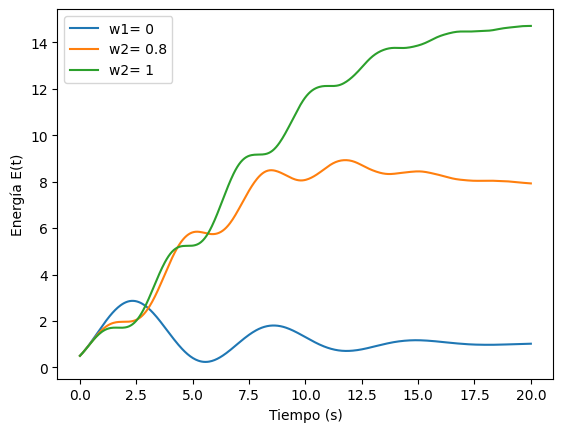

In [21]:
# Para la energia


# Para E(t) con w1 = 0

t_f1= sol_f1.t
xf1 = sol_f1.y[0]  # Posición
vf1 = sol_f1.y[1]  # Velocidad

Ef1 =  (0.5 * m * vf1**2) + (0.5 * k * xf1**2)

# Para E(t) con w2 = 0.8

t_f2= sol_f2.t
xf2 = sol_f2.y[0]  # Posición
vf2 = sol_f2.y[1]  # Velocidad

Ef2 = (0.5 * m * vf2**2) + (0.5 * k * xf2**2)

# Para E(t) con w3 = 1

t_f3= sol_f3.t
xf3 = sol_f3.y[0]  # Posición
vf3 = sol_f3.y[1]  # Velocidad

Ef3 =  (0.5 * m * vf3**2) + (0.5 * k * xf3**2)

# Graficar
plt.plot(t_f1, Ef1, label= f'w1= {omega1}' )
plt.plot(t_f2,Ef2, label=f'w2= {omega2}')
plt.plot(t_f3,Ef3, label=f'w2= {omega3}')
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía E(t)")
plt.legend()
plt.show()

# 6

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- α = 0.8 (tasa de reproducción de los conejos)
- β = 0.04 (tasa de depredación de conejos por zorros)
- γ = 0.3 (tasa de mortalidad natural de los zorros)
- δ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


a. Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b. Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c. Compare los resultados de Euler y RK4 mediante:
   * Gráficas de la evolución temporal de ambas poblaciones
   * Diagrama de fase (x vs y)
   * Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

d. Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

e. Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

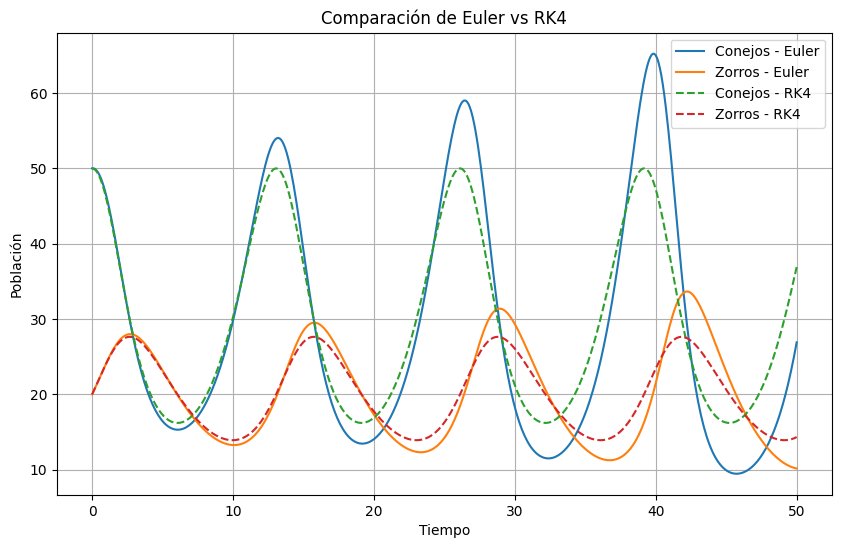

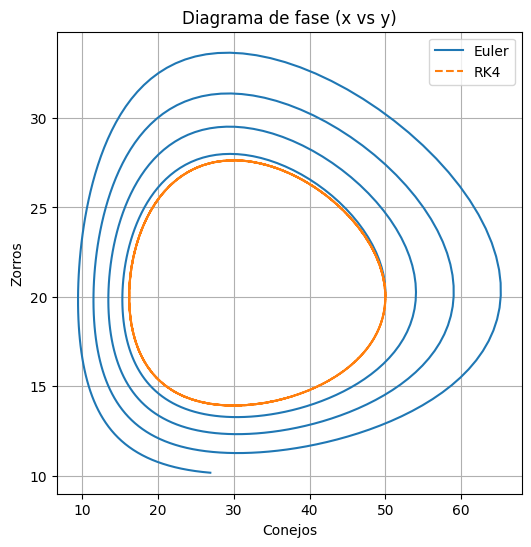

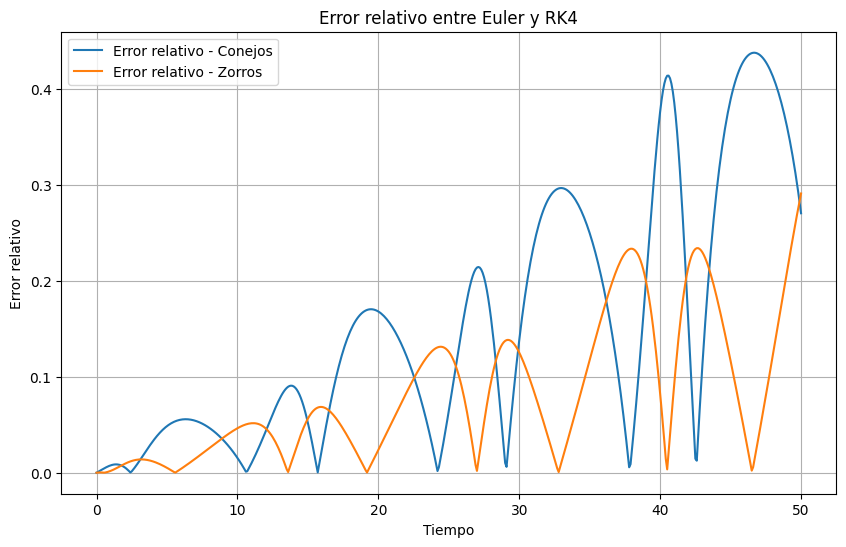

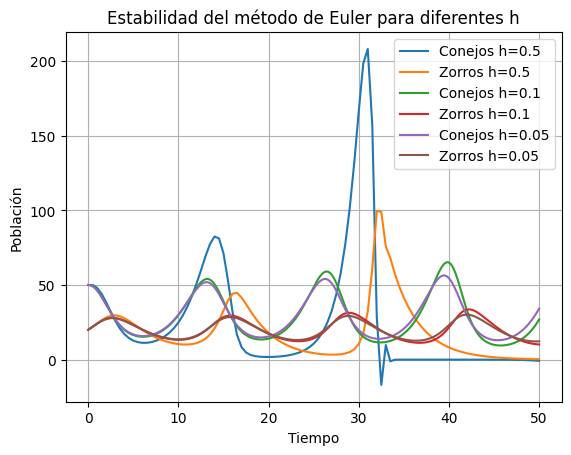

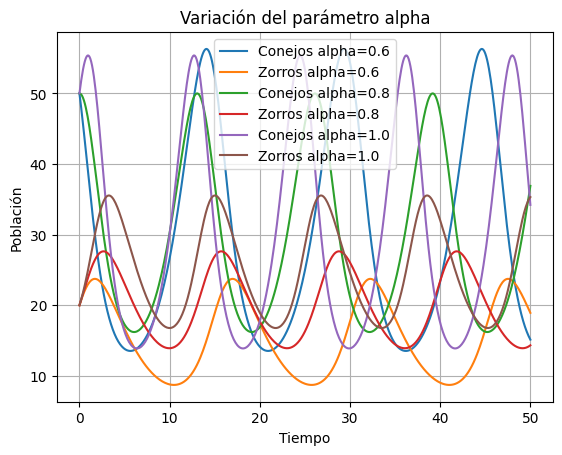

In [ ]:
# TAREA DE COMPUTACIÓN - SISTEMA DEPREDADOR-PRESA
# PUNTO 6

import numpy as np
import matplotlib.pyplot as plt

# Parámetros dados
alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01

# Condiciones iniciales
x0 = 50  # conejos
y0 = 20  # zorros
T = 50   # tiempo total

# Definición del sistema de ecuaciones diferenciales
def system(x, y):
    dx = alpha * x - beta * x * y
    dy = -gamma * y + delta * x * y
    return dx, dy

# a. Método de Euler
def euler(h):
    N = int(T / h)
    x, y = np.zeros(N+1), np.zeros(N+1)
    x[0], y[0] = x0, y0
    t = np.linspace(0, T, N+1)
    for i in range(N):
        dx, dy = system(x[i], y[i])
        x[i+1] = x[i] + h * dx
        y[i+1] = y[i] + h * dy
    return t, x, y

# b. Método de Runge-Kutta de segundo orden
def rk2(h):
    N = int(T / h)
    x, y = np.zeros(N+1), np.zeros(N+1)
    x[0], y[0] = x0, y0
    t = np.linspace(0, T, N+1)
    for i in range(N):
        dx1, dy1 = system(x[i], y[i])
        dx2, dy2 = system(x[i] + h * dx1 / 2, y[i] + h * dy1 / 2)
        x[i+1] = x[i] + h * dx2
        y[i+1] = y[i] + h * dy2
    return t, x, y

# b. Método de Runge-Kutta de cuarto orden (RK4)
def rk4(h):
    N = int(T / h)
    x, y = np.zeros(N+1), np.zeros(N+1)
    x[0], y[0] = x0, y0
    t = np.linspace(0, T, N+1)
    for i in range(N):
        k1x, k1y = system(x[i], y[i])
        k2x, k2y = system(x[i] + h * k1x / 2, y[i] + h * k1y / 2)
        k3x, k3y = system(x[i] + h * k2x / 2, y[i] + h * k2y / 2)
        k4x, k4y = system(x[i] + h * k3x, y[i] + h * k3y)

        x[i+1] = x[i] + (h / 6) * (k1x + 2*k2x + 2*k3x + k4x)
        y[i+1] = y[i] + (h / 6) * (k1y + 2*k2y + 2*k3y + k4y)
    return t, x, y

# c. Comparación de resultados con gráficas y errores
h = 0.1
t_euler, x_euler, y_euler = euler(h)
t_rk4, x_rk4, y_rk4 = rk4(h)

plt.figure(figsize=(10,6))
plt.plot(t_euler, x_euler, label='Conejos - Euler')
plt.plot(t_euler, y_euler, label='Zorros - Euler')
plt.plot(t_rk4, x_rk4, '--', label='Conejos - RK4')
plt.plot(t_rk4, y_rk4, '--', label='Zorros - RK4')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.title('Comparación de Euler vs RK4')
plt.grid()
plt.show()

# Diagrama de fase
plt.figure(figsize=(6,6))
plt.plot(x_euler, y_euler, label='Euler')
plt.plot(x_rk4, y_rk4, '--', label='RK4')
plt.xlabel('Conejos')
plt.ylabel('Zorros')
plt.legend()
plt.title('Diagrama de fase (x vs y)')
plt.grid()
plt.show()

# Cálculo del error relativo
def error_relativo(x_ref, x_aprox):
    return np.abs((x_ref - x_aprox) / x_ref)

err_rel_x = error_relativo(x_rk4, x_euler)
err_rel_y = error_relativo(y_rk4, y_euler)

plt.figure(figsize=(10,6))
plt.plot(t_euler, err_rel_x, label='Error relativo - Conejos')
plt.plot(t_euler, err_rel_y, label='Error relativo - Zorros')
plt.xlabel('Tiempo')
plt.ylabel('Error relativo')
plt.legend()
plt.title('Error relativo entre Euler y RK4')
plt.grid()
plt.show()

# d. Análisis de estabilidad para distintos pasos
for h_test in [0.5, 0.1, 0.05]:
    t_test, x_test, y_test = euler(h_test)
    plt.plot(t_test, x_test, label=f'Conejos h={h_test}')
    plt.plot(t_test, y_test, label=f'Zorros h={h_test}')

plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Estabilidad del método de Euler para diferentes h')
plt.legend()
plt.grid()
plt.show()

# e. Investigación con variaciones de parámetros

parametros = {'alpha': [0.6, 0.8, 1.0], 'beta': [0.02, 0.04, 0.06], 'gamma': [0.2, 0.3, 0.4], 'delta': [0.005, 0.01, 0.02]}

# Elegimos el parámetro alpha como ejemplo:
parametro = 'alpha'
valores = parametros[parametro]

for valor in valores:
    alpha = valor  # Se varía alpha, y se simula
    t_var, x_var, y_var = rk4(0.1)
    plt.plot(t_var, x_var, label=f'Conejos {parametro}={valor}')
    plt.plot(t_var, y_var, label=f'Zorros {parametro}={valor}')

plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title(f'Variación del parámetro {parametro}')
plt.legend()
plt.grid()
plt.show()


# 7

En un laboratorio de dinámica, se estudia el comportamiento de dos péndulos acoplados mediante un resorte de constante elástica $k$. Cada péndulo de longitud $L$ y masa $m$ está suspendido de un soporte fijo y oscila en el plano. Se asume que los desplazamientos son pequeños, permitiendo aproximar el movimiento mediante ecuaciones diferenciales lineales.  

Las ecuaciones de movimiento para los ángulos $\theta_1(t)$ y $\theta_2(t)$ de los péndulos con respecto a la vertical están dadas por el sistema:  

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Definiendo el vector de estado $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, escribir el sistema en forma matricial como una ecuación de primer orden:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{A}$ es la matriz de coeficientes del sistema.  

- Expresar el sistema en forma de ecuaciones diferenciales de primer orden.  
- Construir la matriz $\mathbf{A}$ del sistema.  
- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  
- Comparar los resultados obtenidos con los distintos métodos numéricos.  
- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  
- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.
- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  

Para la simulación, se pueden utilizar los valores:  
- $m = 1$ kg,  
- $L = 1$ m,  
- $g = 9.81$ m/s²,  
- $k = 0.5$ N/m,  
- Condiciones iniciales: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.  
- Intervalo de simulación: $t \in [0,10]$ s con paso $\Delta t = 0.01$ s.  


Matriz A:
[[  0.     1.     0.     0.  ]
 [-10.31   0.     0.5    0.  ]
 [  0.     0.     0.     1.  ]
 [  0.5    0.   -10.31   0.  ]]


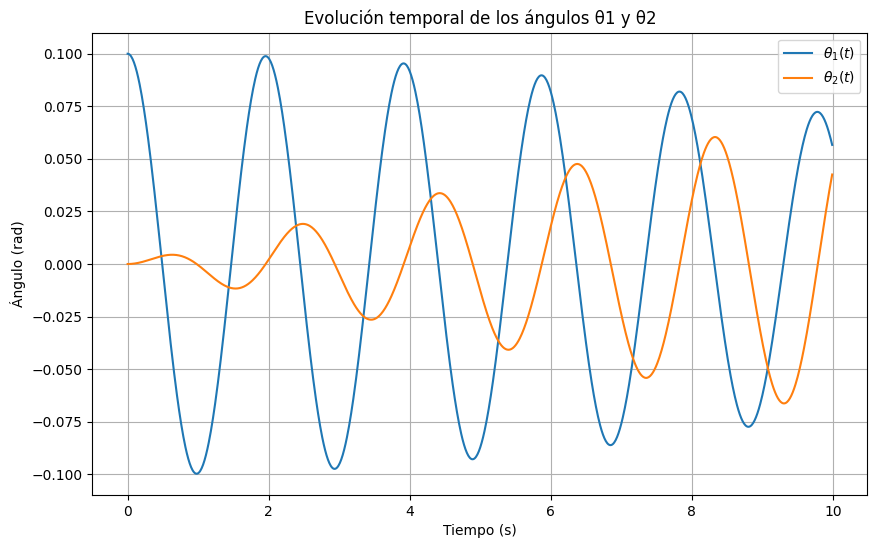

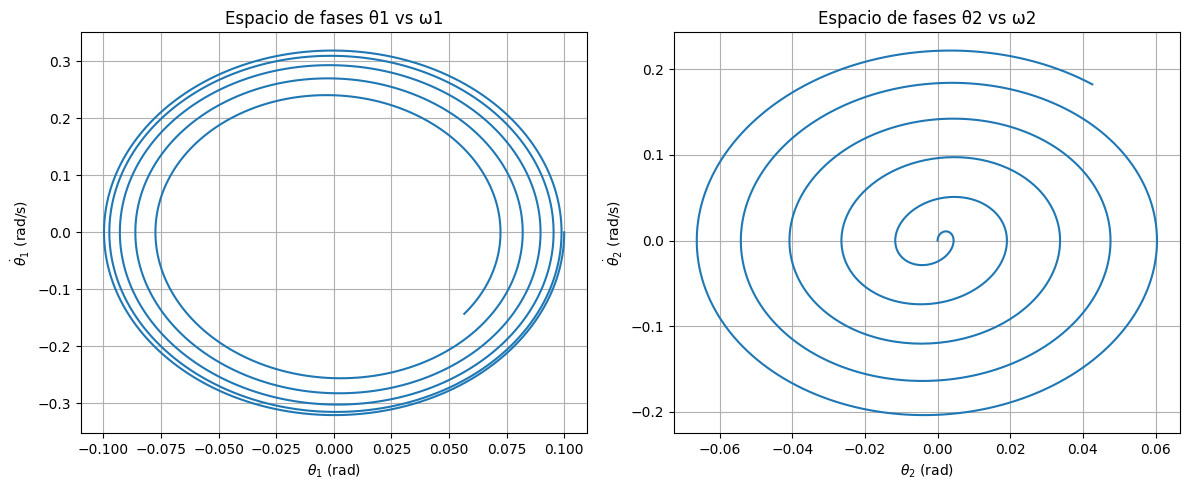

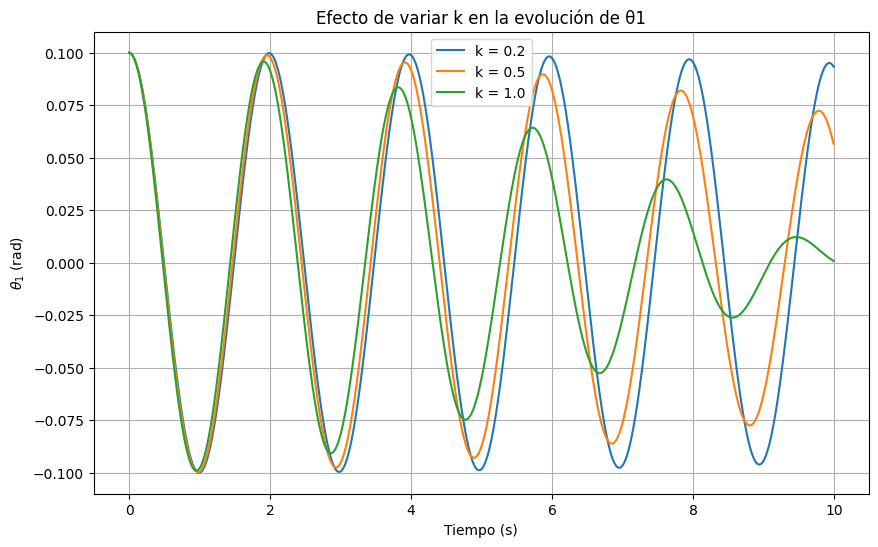

In [ ]:
# Ejercicio 7: Dinámica de dos péndulos acoplados - Método RK4

import numpy as np
import matplotlib.pyplot as plt

# Parámetros dados
m = 1      # kg
L = 1      # m
g = 9.81   # m/s^2
k = 0.5    # N/m

# a) Expresar el sistema en forma de ecuaciones diferenciales de primer orden
def sistema(y, t, m, L, g, k):
    # y = [theta1, omega1, theta2, omega2]
    theta1, omega1, theta2, omega2 = y

    # Ecuaciones
    domega1_dt = (-m*g*L*theta1 - k*L**2*(theta1 - theta2)) / (m*L**2)
    domega2_dt = (-m*g*L*theta2 - k*L**2*(theta2 - theta1)) / (m*L**2)

    return np.array([omega1, domega1_dt, omega2, domega2_dt])

# b) Construir la matriz A (coeficientes del sistema linealizado)
A = np.array([
    [0, 1, 0, 0],
    [-(g/L + k/(m*L)), 0, k/(m*L), 0],
    [0, 0, 0, 1],
    [k/(m*L), 0, -(g/L + k/(m*L)), 0]
])
print("Matriz A:")
print(A)

# c) Método de Runge-Kutta de cuarto orden (RK4)
def rk4(f, y0, t, args=()):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0

    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(y[i-1], t[i-1], *args)
        k2 = f(y[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *args)
        k3 = f(y[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *args)
        k4 = f(y[i-1] + h*k3, t[i-1] + h, *args)
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

    return y

# Condiciones iniciales: θ1(0)=0.1, ω1(0)=0, θ2(0)=0, ω2(0)=0
y0 = np.array([0.1, 0, 0, 0])

# Tiempo de simulación
t = np.arange(0, 10, 0.01)

# d) Resolver el sistema usando RK4
y_rk4 = rk4(sistema, y0, t, args=(m, L, g, k))

# e) Análisis de la estabilidad (se puede observar cómo se comportan para distintos k más adelante)

# f) Graficar la evolución temporal
plt.figure(figsize=(10, 6))
plt.plot(t, y_rk4[:, 0], label=r'$\theta_1(t)$')
plt.plot(t, y_rk4[:, 2], label=r'$\theta_2(t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Evolución temporal de los ángulos θ1 y θ2')
plt.legend()
plt.grid()
plt.show()

# g) Representar las trayectorias en el espacio de fases (θ1 vs ω1 y θ2 vs ω2)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(y_rk4[:, 0], y_rk4[:, 1])
plt.xlabel(r'$\theta_1$ (rad)')
plt.ylabel(r'$\dot{\theta}_1$ (rad/s)')
plt.title('Espacio de fases θ1 vs ω1')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(y_rk4[:, 2], y_rk4[:, 3])
plt.xlabel(r'$\theta_2$ (rad)')
plt.ylabel(r'$\dot{\theta}_2$ (rad/s)')
plt.title('Espacio de fases θ2 vs ω2')
plt.grid()

plt.tight_layout()
plt.show()

# h) Efectos de variar k (constante del resorte) sobre la dinámica
valores_k = [0.2, 0.5, 1.0]

plt.figure(figsize=(10, 6))
for k_i in valores_k:
    y_temp = rk4(sistema, y0, t, args=(m, L, g, k_i))
    plt.plot(t, y_temp[:, 0], label=f'k = {k_i}')

plt.xlabel('Tiempo (s)')
plt.ylabel(r'$\theta_1$ (rad)')
plt.title('Efecto de variar k en la evolución de θ1')
plt.legend()
plt.grid()
plt.show()


# 8
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.  

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento de la partícula testigo son:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$  

donde $U$ es el **potencial efectivo** del sistema, definido como:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2).
$$

Aquí, $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$, respectivamente. En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y la constante gravitacional está absorbida en la normalización, la **velocidad angular del sistema** es:  

$$
\omega^2 = 1.
$$  

Existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran.  

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$- Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter

Valor crítico mu_c ≈ 0.01000


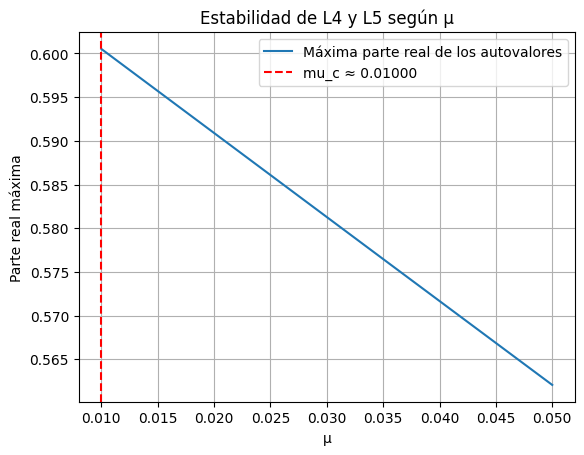

Estabilidad L4/L5 para el sistema Sol-Tierra: Inestable
Estabilidad L4/L5 para el sistema Sol-Júpiter: Inestable


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

# Constantes y parámetros
G = 1  # Constante gravitacional normalizada
omega2 = 1  # Velocidad angular al cuadrado

# Definir el potencial efectivo U y sus derivadas

def U_pot(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - (1 - mu))**2 + y**2)
    return -G*(1 - mu)/r1 - G*mu/r2 - 0.5 * omega2 * (x**2 + y**2)

def second_derivatives_U(mu, xL, yL):
    r1 = np.sqrt((xL + mu)**2 + yL**2)
    r2 = np.sqrt((xL - (1 - mu))**2 + yL**2)

    dUxx = (G*(1 - mu) * (3*(xL + mu)**2 - r1**2) / r1**5
           + G*mu * (3*(xL - (1 - mu))**2 - r2**2) / r2**5 - omega2)

    dUyy = (G*(1 - mu) * (3*yL**2 - r1**2) / r1**5
           + G*mu * (3*yL**2 - r2**2) / r2**5 - omega2)

    dUxy = (3 * G * (1 - mu) * (xL + mu) * yL / r1**5
           + 3 * G * mu * (xL - (1 - mu)) * yL / r2**5)

    return dUxx, dUxy, dUxy, dUyy

# Puntos de Lagrange triangulares

def lagrange_L4(mu):
    xL = 0.5 - mu
    yL = np.sqrt(3) / 2
    return xL, yL

def construct_matrix_A(mu):
    xL, yL = lagrange_L4(mu)
    a, b, c, d = second_derivatives_U(mu, xL, yL)

    A = np.array([[0, 1, 0, 0],
                  [a, 0, b, 2*omega2**0.5],
                  [0, 0, 0, 1],
                  [c, -2*omega2**0.5, d, 0]])
    return A

# Función para analizar estabilidad
def analyze_stability(mu):
    A = construct_matrix_A(mu)
    eigenvalues, _ = eig(A)
    stable = np.all(np.real(eigenvalues) <= 0)
    return eigenvalues, stable

# Encontrar el valor crítico mu_c mediante barrido
mu_values = np.linspace(0.01, 0.05, 500)
mu_critical = None

for mu in mu_values:
    eigvals, stable = analyze_stability(mu)
    if not stable:
        mu_critical = mu
        break

print(f"Valor crítico mu_c ≈ {mu_critical:.5f}")

# Graficar parte real de los eigenvalores vs mu
real_parts = []

for mu in mu_values:
    eigvals, _ = analyze_stability(mu)
    real_parts.append(np.max(np.real(eigvals)))

plt.plot(mu_values, real_parts, label="Máxima parte real de los autovalores")
plt.axvline(mu_critical, color='r', linestyle='--', label=f"mu_c ≈ {mu_critical:.5f}")
plt.xlabel("μ")
plt.ylabel("Parte real máxima")
plt.title("Estabilidad de L4 y L5 según μ")
plt.legend()
plt.grid()
plt.show()

# Comprobar la estabilidad para el caso Sol-Tierra y Sol-Júpiter
mu_sol_tierra = 3.0035e-6
mu_sol_jupiter = 0.0009539

eigvals_tierra, stable_tierra = analyze_stability(mu_sol_tierra)
eigvals_jupiter, stable_jupiter = analyze_stability(mu_sol_jupiter)

print(f"Estabilidad L4/L5 para el sistema Sol-Tierra: {'Estable' if stable_tierra else 'Inestable'}")
print(f"Estabilidad L4/L5 para el sistema Sol-Júpiter: {'Estable' if stable_jupiter else 'Inestable'}")


# 9

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


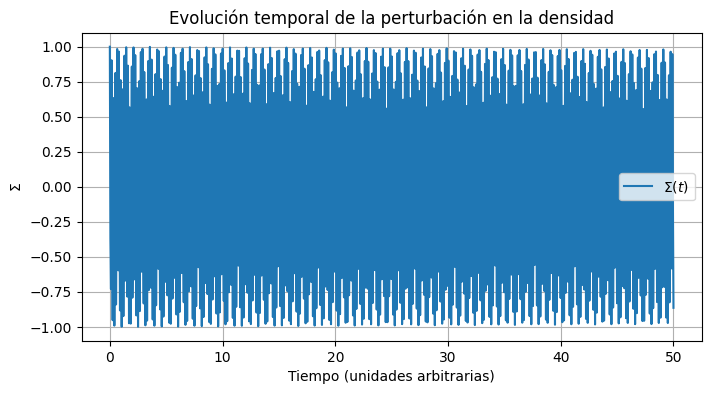

Valores propios: [0.+38.89087297j 0.-38.89087297j]


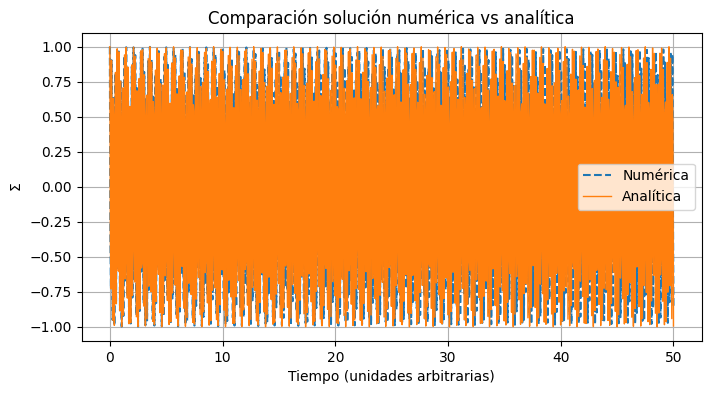

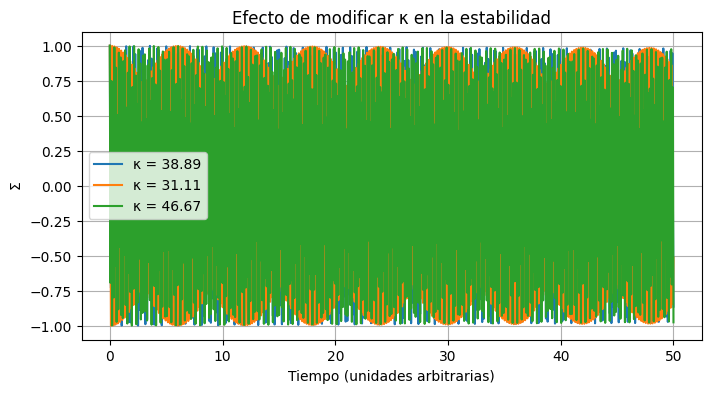

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import eig

# Parámetros
V0 = 220  # km/s, velocidad plana típica para galaxias
r = 8.0   # kpc, radio típico

# Definimos Omega y kappa
Omega = V0 / r  # Frecuencia angular
kappa = np.sqrt(2) * Omega  # Frecuencia de epiciclo

# Sistema de ecuaciones diferenciales para Σ(t)
# d²Σ/dt² + k²Σ = 0 -> Sistema de primer orden:
# dΣ/dt = v
# dv/dt = -k² Σ
def sistema(t, y):
    return [y[1], -kappa**2 * y[0]]

# Condiciones iniciales
Sigma0 = 1.0  # Perturbación inicial
v0 = 0.0      # Velocidad inicial
y0 = [Sigma0, v0]

# Tiempo de integración
t_span = (0, 50)  # en unidades de tiempo arbitrarias
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solución numérica
sol = solve_ivp(sistema, t_span, y0, t_eval=t_eval)

# Graficar la evolución temporal de Σ(t)
plt.figure(figsize=(8, 4))
plt.plot(sol.t, sol.y[0], label=r'$\Sigma(t)$')
plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel(r'$\Sigma$')
plt.title('Evolución temporal de la perturbación en la densidad')
plt.grid()
plt.legend()
plt.show()

# Matriz del sistema linealizado: d/dt [Σ, v] = [[0,1], [-k²,0]] * [Σ,v]
A = np.array([[0, 1], [-kappa**2, 0]])

# Valores propios
eigenvalues, eigenvectors = eig(A)

print("Valores propios:", eigenvalues)

# Comparación con solución analítica
Sigma_analitica = Sigma0 * np.cos(kappa * t_eval)  # Solución analítica

plt.figure(figsize=(8, 4))
plt.plot(t_eval, sol.y[0], label='Numérica', linestyle='--')
plt.plot(t_eval, Sigma_analitica, label='Analítica', linewidth=1)
plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel(r'$\Sigma$')
plt.title('Comparación solución numérica vs analítica')
plt.grid()
plt.legend()
plt.show()

# Analizar estabilidad modificando kappa
kappas = [kappa, kappa * 0.8, kappa * 1.2]

plt.figure(figsize=(8, 4))
for k_val in kappas:
    def sistema_k(t, y):
        return [y[1], -k_val**2 * y[0]]

    sol_k = solve_ivp(sistema_k, t_span, y0, t_eval=t_eval)
    plt.plot(sol_k.t, sol_k.y[0], label=f'κ = {k_val:.2f}')

plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel(r'$\Sigma$')
plt.title('Efecto de modificar κ en la estabilidad')
plt.grid()
plt.legend()
plt.show()
